# Trajectory Test

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.ma as ma
import numpy as np
import netCDF4
import gridded

In [14]:
url = 'http://geoport.whoi.edu/thredds/dodsC/examples/bora_feb.nc'

In [15]:
nc = netCDF4.Dataset(url)
lon = nc['lon_rho'][:]
lat = nc['lat_rho'][:]
temp = nc['temp'][-1,-1,:,:]

In [16]:
x = np.linspace(13., 15.)
y = np.linspace(45.3, 43.5)
len(x)

50

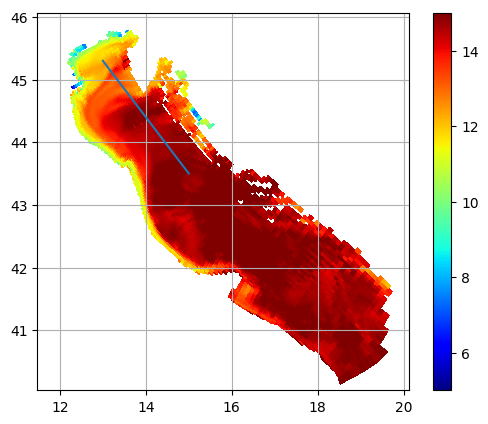

In [22]:
fig = plt.figure(figsize=(6, 5), dpi=100)
plt.pcolormesh(lon,lat,ma.masked_invalid(temp),vmin=5,vmax=15,cmap='jet');
plt.plot(x,y,'-')
plt.grid()
plt.colorbar();

In [18]:
#Create temperature Variable from the file
temperature = gridded.Variable.from_netCDF(filename=url, name='Temperature', varname='temp')

#Create salinity Variable from the file, and sharing the same grid as temperature
salinity = gridded.Variable.from_netCDF(filename=url, name='Salinity', varname='salt', grid=temperature.grid)

points = np.column_stack((x,y))
t0 = temperature.time.max_time

## Interpolate values at array of lon,lat points at specific time

In [19]:
salts = salinity.at(points, t0)

In [20]:
temps = temperature.at(points, t0)

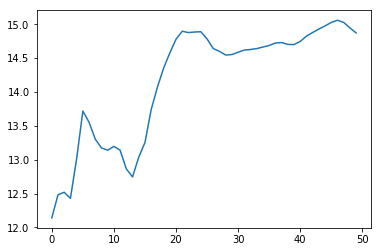

In [9]:
plt.plot(temps)

In [10]:
times = temperature.time.data
len(times)

8

## Interpolate values at lon,lat points with changing time values

In [11]:
over_time = [temperature.at((x[0],y[0]), t) for i,t in enumerate(times)]

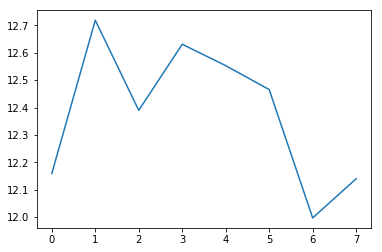

In [12]:
plt.plot(over_time)